In [1]:
import json
import os

with open('/Users/marie/Documents/github/config.json', 'r') as f:
    config = json.load(f)

    for key in config:
        os.environ[key] = config[key]

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# ! pip install langchain-openai

In [199]:
import langchain_openai
import pandas as pd
from langchain_openai import OpenAIEmbeddings
import tqdm

In [106]:
import plotly.express as px
import plotly
import plotly.io as pio
pio.templates.default = 'simple_white'

In [21]:
pd.set_option('display.max_colwidth', 5000)

# Load data

In [18]:
df = pd.read_csv('sample_stack_exchange_data.csv', sep = '\t')

In [19]:
df.topic.value_counts()

topic
ai                100
coffee            100
astronomy         100
pets              100
politics          100
bioinformatics    100
genai             100
bicycles          100
travel            100
fitness           100
chess             100
economics         100
datascience       100
movies            100
Name: count, dtype: int64

In [22]:
df.sample(5)

full_text  \
837                                                                          Can I interrupt quarantine to go get the 2nd dose of the vaccine after coming back from an amber list-country?\nFrom here I read\n\nIf you have been in a country or territory on the:\n\n[...]\namber list - you must quarantine in the place you’re staying and take 2 COVID-19 tests\n\n\nThis makes me think I can't leave the house, not even to only go to the place where I can get the 2nd dose of the vaccine.\nI'm asking anyway to understand if that's the case or not.\n   
1100                                                                                                                                                                      How can the VNM completeness axiom be derived from the transitivity and continuity axioms?\nMy teacher mentioned off-hand that the first Von Neumann Morgenstern axiom of completeness is not actually necessary to prove the Expected Utility Property, and that the axiom of completeness is in fact implied by the axioms of continuity and transitivity. I don't see why this is. \n   
1028                                                                                                                                                                                                                                                                              Kasparov trying to poison Kamsky\nDid the mature Gata Kamsky ever try to explain the accusations against Kasparov in the early 1990s about Kasparov trying to poison him? I remember at least a couple interviews in New in Chess magazine where the accusations were made.   \n   
495                                                    What was the reasoning behind putting the right to keep and bear arms in the US Constitution?\nThe Second Amendment is currently the focus of both sides with some claiming they are trying to protect it, and others trying to curtail the rights that others claim it was intended to protect.\nSo what was the reasoning for including the "Right to Keep and Bear Arms" in the bill of rights?\nSince no one is over 200 years old I expect answers will include references for their claims of fact.\n   
958   I can't touch my butt with my heel\nI'm having a long existencial issue with touching my heel with my butt as part of stretching, I see most people can do it, why can't I? I can't even squat well! I'm afraid of over stretching the ligaments of my knee or something.\nI'm 6,0" tall (1,82m) and I don't think that's an issue. I couldn't even do it in my childhood and now since I've started jogging as part of my training for future marathons (a long journey) I'm genuinely afraid to have an injury because of this. Thank you for your time!\n   

          topic  tokens  
837      travel     111  
1100  economics      76  
1028      chess      64  
495    politics      98  
958     fitness     138

# Calculating embeddings 

In [24]:
embeddings_model = OpenAIEmbeddings()

In [33]:
df['embedding'] = df.full_text.map(
    lambda x: embeddings_model.embed_query(x)
)

In [39]:
df['id'] = list(map(
    lambda x: x + 1,
    range(df.shape[0])
))

In [41]:
# df.embedding.map(lambda x: len(x))

In [78]:
df.to_csv('sample_stack_exchange_data_with_emb.csv', sep = '\t', index = False)

# Visualising embeddings 
## PCA

In [566]:
df = pd.read_csv('sample_stack_exchange_data_with_emb.csv', sep = '\t')

In [567]:
df['embedding'] = df.embedding.map(lambda x: eval(x))

In [85]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
pca_model = PCA(n_components = 2)

In [86]:
import numpy as np
embeddings_array = np.array(df.embedding.values.tolist())
embeddings_array.shape

(1400, 1536)

In [87]:
pca_model.fit(embeddings_array)

PCA(n_components=2)

In [88]:
pca_embeddings_values = pca_model.transform(embeddings_array)

In [89]:
pca_embeddings_values.shape

(1400, 2)

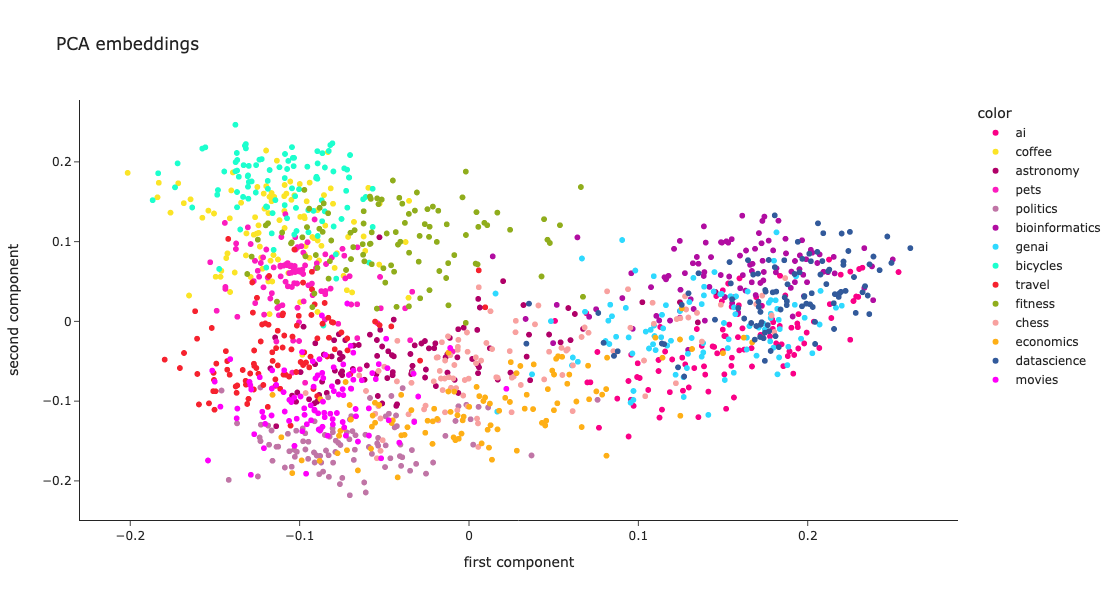

In [568]:
fig = px.scatter(
    x = pca_embeddings_values[:,0], 
    y = pca_embeddings_values[:,1],
    color = df.topic.values,
    hover_name = df.full_text.values,
    title = 'PCA embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r
)

fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

## t-SNE

In [112]:
from sklearn.manifold import TSNE

In [114]:
tsne_model = TSNE(n_components=2, random_state=42)

In [118]:
%%time
tsne_embeddings_values = tsne_model.fit_transform(embeddings_array)

CPU times: user 32.4 s, sys: 7.29 s, total: 39.7 s
Wall time: 5.37 s


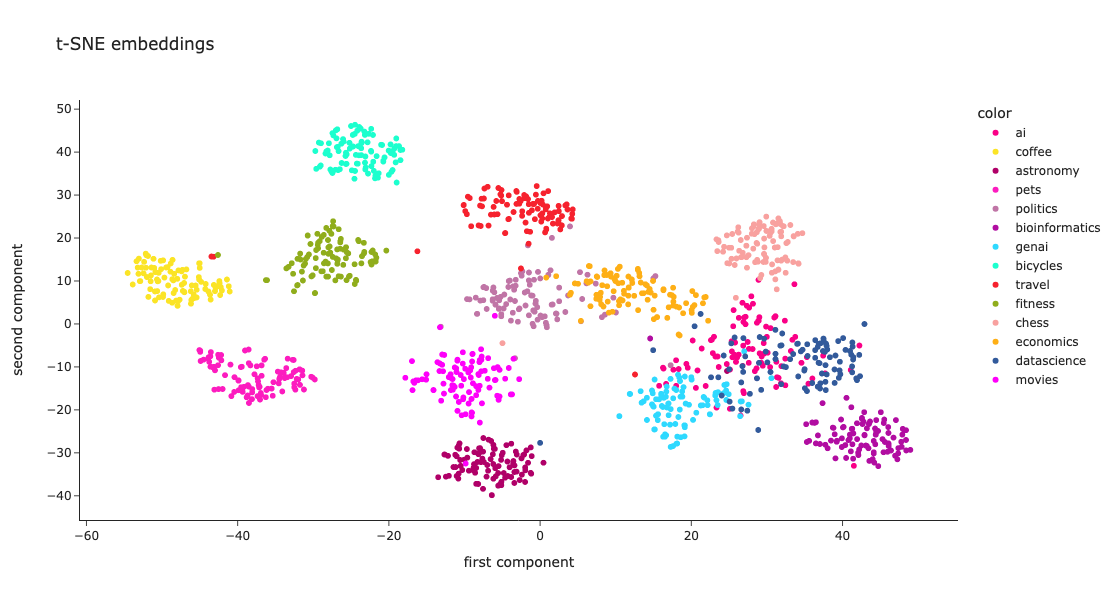

In [123]:
fig = px.scatter(
    x = tsne_embeddings_values[:,0], 
    y = tsne_embeddings_values[:,1],
    color = df.topic.values,
    hover_name = df.full_text.values,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

In [124]:
tsne_model_3d = TSNE(n_components=3, random_state=42)

In [128]:
%%time
tsne_3d_embeddings_values = tsne_model_3d.fit_transform(embeddings_array)

CPU times: user 43.6 s, sys: 10.8 s, total: 54.4 s
Wall time: 7.31 s


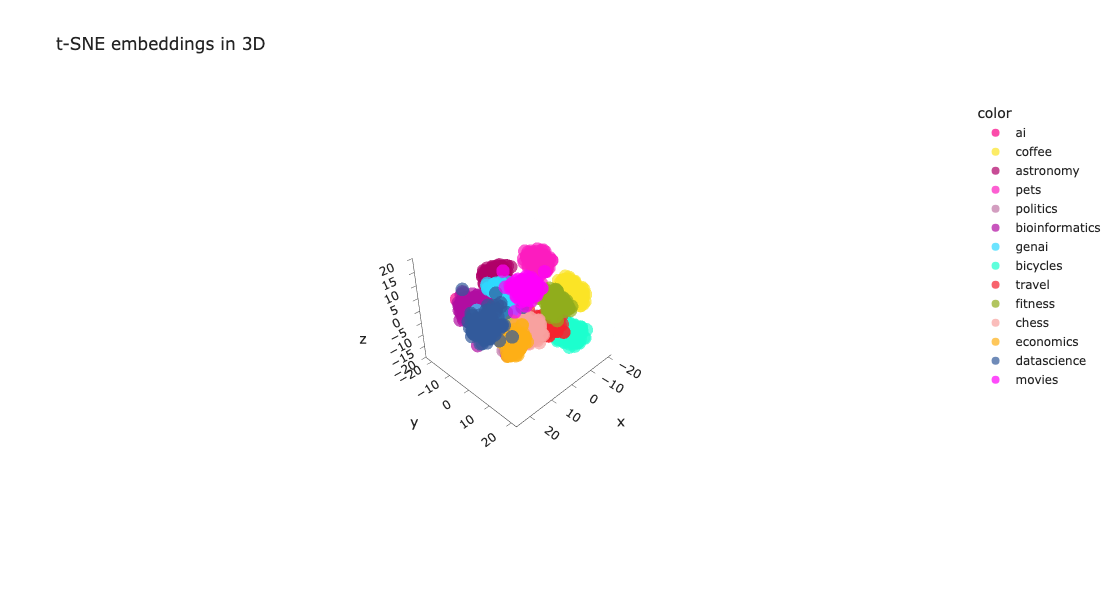

In [569]:
fig = px.scatter_3d(
    x = tsne_3d_embeddings_values[:,0], 
    y = tsne_3d_embeddings_values[:,1],
    z = tsne_3d_embeddings_values[:,2],
    color = df.topic.values,
    hover_name = df.full_text.values,
    title = 't-SNE embeddings in 3D', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r,
    opacity = 0.7
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

# Distances

### Examples

In [151]:
embedding = df.iloc[0].embedding

In [152]:
np.linalg.norm(embedding)

1.000000000000001

In [165]:
vector1 = [1, 2]
vector2 = [3, 4]

In [166]:
sum(list(map(
    lambda x, y: (x - y) ** 2,
    vector1, 
    vector2
))) ** 0.5

2.8284271247461903

In [167]:
np.linalg.norm((np.array(vector1) - np.array(vector2)), ord = 2)

2.8284271247461903

In [168]:
def get_l2_distance(vector1, vector2):
    return np.linalg.norm((np.array(vector1) - np.array(vector2)), ord = 2)

In [169]:
sum(list(map(
    lambda x, y: abs(x - y),
    vector1, 
    vector2
)))

4

In [170]:
np.linalg.norm((np.array(vector1) - np.array(vector2)), ord = 1)

4.0

In [171]:
def get_l1_distance(vector1, vector2):
    return np.linalg.norm((np.array(vector1) - np.array(vector2)), ord = 1)

In [173]:
sum(list(map(
    lambda x, y: x*y,
    vector1, 
    vector2
)))

11

In [174]:
np.dot(vector1, vector2)

11

In [175]:
def get_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

In [181]:
dot_product = sum(list(map(
    lambda x, y: x*y,
    vector1, 
    vector2
)))

norm1 = sum(list(map(lambda x: x ** 2, vector1))) ** 0.5
norm2 = sum(list(map(lambda x: x ** 2, vector2))) ** 0.5

dot_product/norm1/norm2

0.9838699100999074

In [183]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(np.array(vector1).reshape(1, -1) , np.array(vector2).reshape(1, -1))[0][0]

0.9838699100999074

In [184]:
def get_cosine_similarity(vector1, vector2):
    return cosine_similarity(np.array(vector1).reshape(1, -1) , np.array(vector2).reshape(1, -1))[0][0]

### Looking at clusters

In [194]:
df = df.set_index('id')

In [200]:
tmp_data = []

for id1 in tqdm.tqdm(df.index.values):
    for id2 in df.index.values:
        if id1 == id2:
            continue
            
        vector1 = df.loc[id1].embedding
        vector2 = df.loc[id2].embedding

        tmp_data.append(
            {
                'id1': id1,
                'id2': id2,
                'topic1': df.loc[id1].topic,
                'topic2': df.loc[id2].topic,
                'l2_distance': get_l2_distance(vector1, vector2),
                'l1_distance': get_l1_distance(vector1, vector2),
                'dot_product': get_dot_product(vector1, vector2),
                'cosine_similarity': get_cosine_similarity(vector1, vector2)
                
            }
        )

100%|██████████████████████████████████████████████████████████████████| 1400/1400 [33:53<00:00,  1.45s/it]


In [201]:
raw_dist_df = pd.DataFrame(tmp_data)
raw_dist_df.head()

id1  id2 topic1 topic2  l2_distance  l1_distance  dot_product  \
0    1    2     ai     ai     0.719300    22.393192     0.741303   
1    1    3     ai     ai     0.774165    23.845820     0.700334   
2    1    4     ai     ai     0.683255    21.233151     0.766581   
3    1    5     ai     ai     0.715389    21.971723     0.744110   
4    1    6     ai     ai     0.684937    21.312950     0.765430   

   cosine_similarity  
0           0.741303  
1           0.700334  
2           0.766581  
3           0.744110  
4           0.765430

In [209]:
raw_dist_df['same_topic'] = list(map(
    lambda x, y: 'same topic' if x == y else 'different topic',
    raw_dist_df.topic1,
    raw_dist_df.topic2
))

In [210]:
raw_dist_df.to_csv('distances.csv', index = False, sep = '\t')

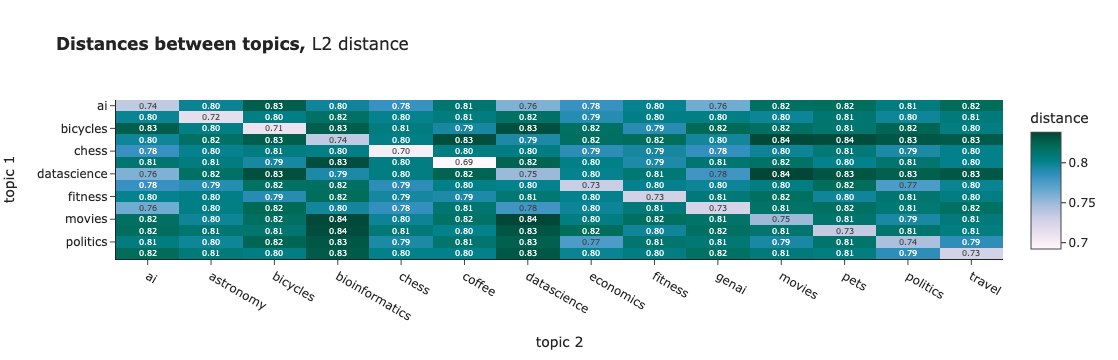

In [580]:
cmp_df = raw_dist_df.pivot_table(index = 'topic1', columns = 'topic2',
                        values = 'l2_distance', aggfunc = 'mean')

fig = px.imshow(cmp_df.values, 
                x = cmp_df.columns,
                y = cmp_df.index,
                text_auto='.2f', aspect="auto",
               labels=dict(x="topic 2", y="topic 1", color="distance"), color_continuous_scale='pubugn',
               title = '<b>Distances between topics,</b> L2 distance', height = 550)
fig.show()

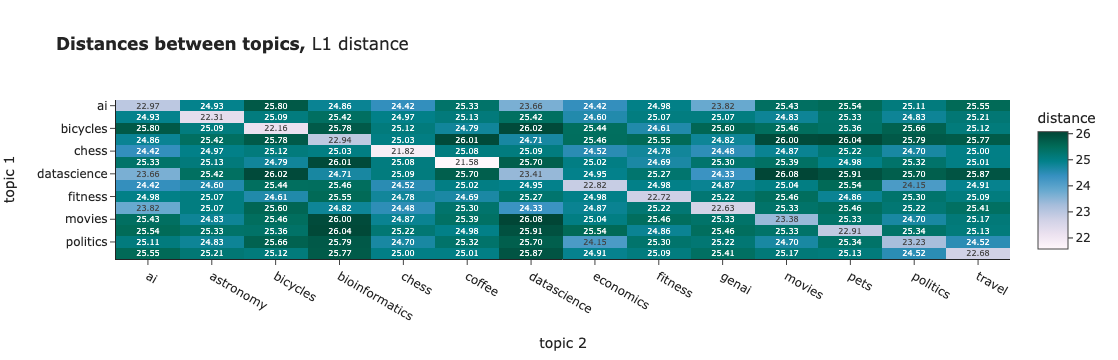

In [581]:
cmp_df = raw_dist_df.pivot_table(index = 'topic1', columns = 'topic2',
                        values = 'l1_distance', aggfunc = 'mean')

fig = px.imshow(cmp_df.values, 
                x = cmp_df.columns,
                y = cmp_df.index,
                text_auto='.2f', aspect="auto",
               labels=dict(x="topic 2", y="topic 1", color="distance"), color_continuous_scale='pubugn',
               title = '<b>Distances between topics,</b> L1 distance', height = 550)
fig.show()

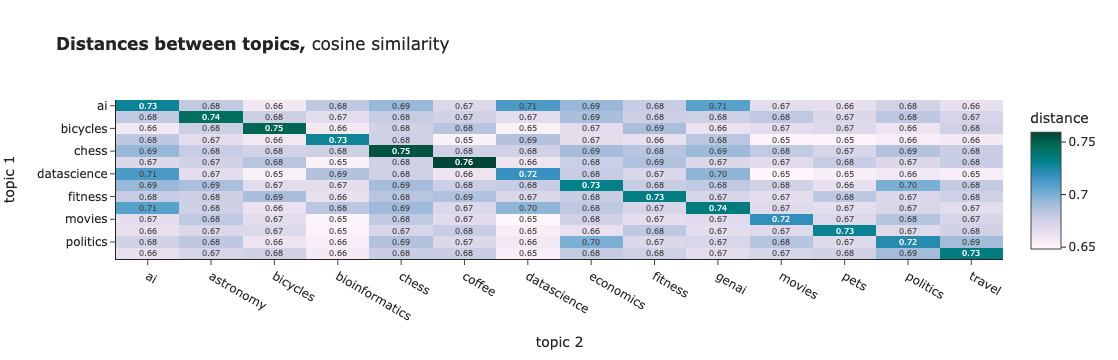

In [582]:
cmp_df = raw_dist_df.pivot_table(index = 'topic1', columns = 'topic2',
                        values = 'cosine_similarity', aggfunc = 'mean')

fig = px.imshow(cmp_df.values, 
                x = cmp_df.columns,
                y = cmp_df.index,
                text_auto='.2f', aspect="auto",
               labels=dict(x="topic 2", y="topic 1", color="distance"), color_continuous_scale='pubugn',
               title = '<b>Distances between topics,</b> cosine similarity', height = 550)
fig.show()

In [584]:
from sklearn.metrics import silhouette_score

In [585]:
silhouette_score(
    X = np.vstack(df.embedding),
    labels = df.topic,
    metric = 'cosine'
)

0.11337167824234858

In [586]:
silhouette_score(
    X = np.vstack(df.embedding),
    labels = df.topic,
    metric = 'l2'
)

0.05996584204429922

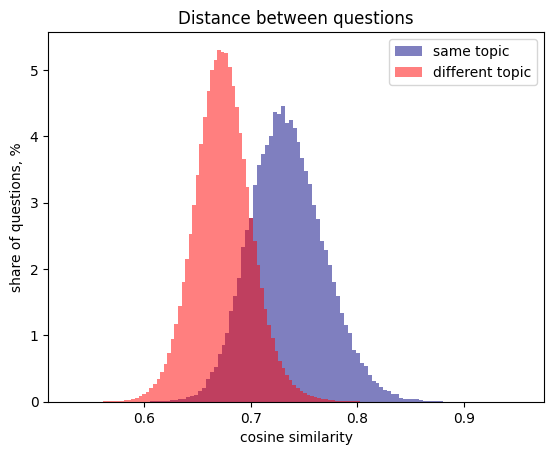

In [235]:
from matplotlib import pyplot

hist_range = None
hist_bins = 100

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'same topic'].cosine_similarity.values,
    label = 'same topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'same topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'same topic'].shape[0]
)

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'different topic'].cosine_similarity.values,
    label = 'different topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'different topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'different topic'].shape[0]
)

pyplot.legend(loc = 'upper right')
pyplot.title('Distance between questions')
pyplot.xlabel('cosine similarity')
pyplot.ylabel('share of questions, %')
pyplot.show()

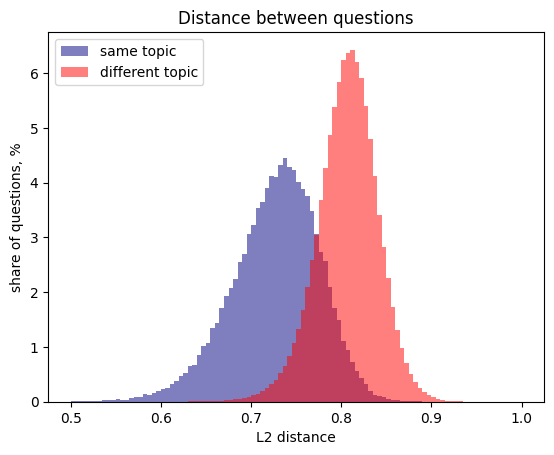

In [238]:
from matplotlib import pyplot

hist_range = [0.5, 1]
hist_bins = 100

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'same topic'].l2_distance.values,
    label = 'same topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'same topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'same topic'].shape[0]
)

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'different topic'].l2_distance.values,
    label = 'different topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'different topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'different topic'].shape[0]
)

pyplot.legend(loc = 'upper left')
pyplot.title('Distance between questions')
pyplot.xlabel('L2 distance')
pyplot.ylabel('share of questions, %')
pyplot.show()

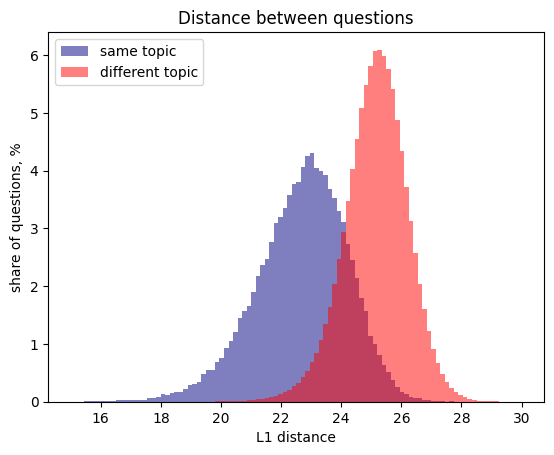

In [242]:
from matplotlib import pyplot

hist_range = [15, 30]
hist_bins = 100

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'same topic'].l1_distance.values,
    label = 'same topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'same topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'same topic'].shape[0]
)

pyplot.hist(
    raw_dist_df[raw_dist_df.same_topic == 'different topic'].l1_distance.values,
    label = 'different topic',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(raw_dist_df[raw_dist_df.same_topic == 'different topic'].index)*100/raw_dist_df[raw_dist_df.same_topic == 'different topic'].shape[0]
)

pyplot.legend(loc = 'upper left')
pyplot.title('Distance between questions')
pyplot.xlabel('L1 distance')
pyplot.ylabel('share of questions, %')
pyplot.show()

# Distance vs dimensionality

In [262]:
df['embed_norm'] = df.embedding.map(lambda vector: np.linalg.norm(np.array(vector)))

In [249]:
dim = 2

In [250]:
embedding_distribution_values = embeddings_array.reshape(1, -1)[0]

In [253]:
import random
random.choice(embedding_distribution_values)

-0.00947052972896371

<Axes: >

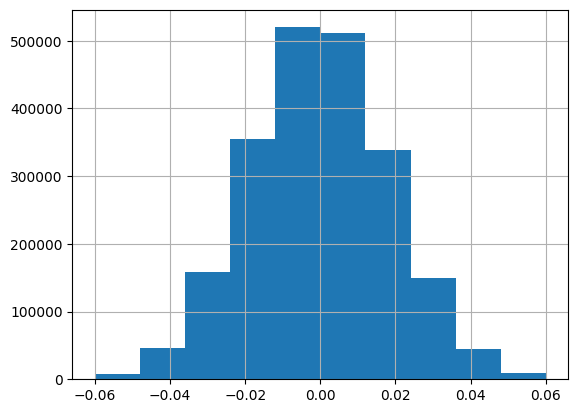

In [192]:
pd.DataFrame(embeddings_array.reshape(1, -1)).T[0].hist(range = (-0.06, 0.06))

In [258]:
def generate_vector(dim, norm = True):
    vector = []
    for i in range(dim):
        vector.append(random.choice(embedding_distribution_values))
    if norm:
        vector = list(map(lambda x: x / np.linalg.norm(np.array(vector)), vector))
    return vector

In [286]:
def generate_samples(n, dim, norm = True):
    tmp_data = []
    for id in range(n):
        tmp_data.append(
            {
                'id': id,
                'embedding': generate_vector(dim, norm)
            }
        )

    return pd.DataFrame(tmp_data).set_index('id')

def get_distances(test_df):
    tmp_data = []
    for id1 in test_df.index.values:
        for id2 in test_df.index.values:
            if id1 == id2:
                continue
                
            vector1 = test_df.loc[id1].embedding
            vector2 = test_df.loc[id2].embedding
    
            tmp_data.append(
                {
                    'id1': id1,
                    'id2': id2,
                    'l2_distance': get_l2_distance(vector1, vector2),
                    'l1_distance': get_l1_distance(vector1, vector2),
                    'cosine_similarity': get_cosine_similarity(vector1, vector2)
                    
                }
            )

    return pd.DataFrame(tmp_data)

In [306]:
tmp_dfs = []

for dim in tqdm.tqdm([5, 10, 50, 100, 500, 1000, 5000, 10000]):
    test_df = generate_samples(300, dim)
    dist_df = get_distances(test_df)
    dist_df['dims'] = dim
    tmp_dfs.append(dist_df)

100%|███████████████████████████████████████████████████████████████████████| 8/8 [22:06<00:00, 165.80s/it]


In [307]:
cmp_dist_df = pd.concat(tmp_dfs)

In [308]:
cmp_dist_df.to_csv('distance_simulation_data.csv', index = False, sep = '\t')

In [342]:
def rgb_to_hex(rgb_string):
    # Extract RGB values from the string
    rgb_values = list(map(int, rgb_string[4:-1].split(',')))

    # Convert RGB to hexadecimal
    hex_color = "#{:02x}{:02x}{:02x}".format(*rgb_values)

    return hex_color

dimensions = list(sorted(cmp_dist_df.dims.unique()))
colors = {}
colormap = plotly.colors.sequential.Teal + ['rgb(0,0,0)']
for i in range(len(dimensions)):
    colors[dimensions[i]] = rgb_to_hex(colormap[i])

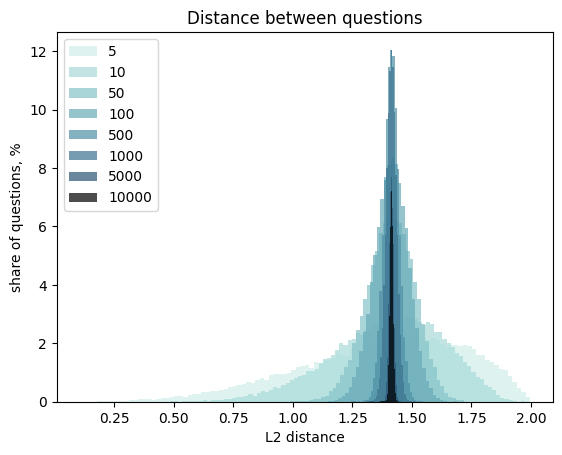

In [343]:
from matplotlib import pyplot

hist_range = None
hist_bins = 100

for dim in cmp_dist_df.dims.unique():
    pyplot.hist(
        cmp_dist_df[cmp_dist_df.dims == dim].l2_distance.values,
        label = dim,
        color = colors[dim],
        alpha = 0.7, range = hist_range, bins = hist_bins,
        # calculating weights to get normalised histogram
        weights = np.ones_like(cmp_dist_df[cmp_dist_df.dims == dim].index)*100/cmp_dist_df[cmp_dist_df.dims == dim].shape[0]
    )

pyplot.legend(loc = 'upper left')
pyplot.title('Distance between questions')
pyplot.xlabel('L2 distance')
pyplot.ylabel('share of questions, %')
pyplot.show()

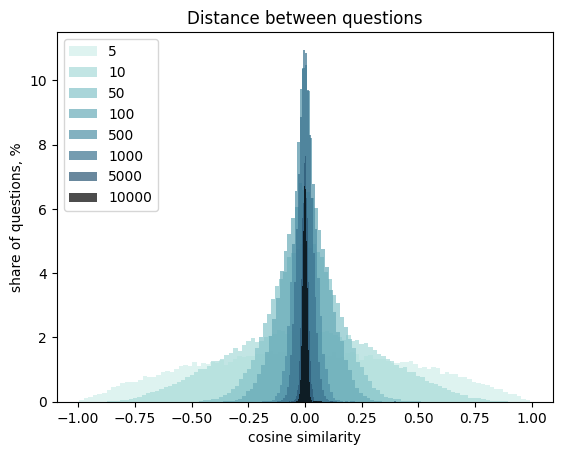

In [365]:
from matplotlib import pyplot

hist_range = None
hist_bins = 100

for dim in cmp_dist_df.dims.unique():
    pyplot.hist(
        cmp_dist_df[cmp_dist_df.dims == dim].cosine_similarity.values,
        label = dim,
        alpha = 0.7, range = hist_range, bins = hist_bins,
        color = colors[dim],
        # calculating weights to get normalised histogram
        weights = np.ones_like(cmp_dist_df[cmp_dist_df.dims == dim].index)*100/cmp_dist_df[cmp_dist_df.dims == dim].shape[0]
    )

pyplot.legend(loc = 'upper left')
pyplot.title('Distance between questions')
pyplot.xlabel('cosine similarity')
pyplot.ylabel('share of questions, %')
pyplot.show()

In [377]:
tmp_df = cmp_dist_df.copy()

In [378]:
tmp_df['cosine_similarity'] = tmp_df['cosine_similarity'].map(lambda x: round(x, 3))

### Bar codes

In [434]:
raw_dist_df[raw_dist_df.id1 == 1].sort_values('cosine_similarity').head(3)

id1   id2 topic1          topic2  l2_distance  l1_distance  dot_product  \
1298    1  1300     ai     datascience     0.903199    28.190908     0.592116   
518     1   520     ai  bioinformatics     0.883320    27.655771     0.609873   
571     1   573     ai  bioinformatics     0.873242    27.289088     0.618725   

      cosine_similarity       same_topic  
1298           0.592116  different topic  
518            0.609873  different topic  
571            0.618725  different topic

In [391]:
raw_dist_df[raw_dist_df.id1 == 1].sort_values('cosine_similarity').tail(1)

id1  id2 topic1 topic2  l2_distance  l1_distance  dot_product  \
93    1   95     ai     ai     0.637144    19.598163     0.797024   

    cosine_similarity  same_topic  
93           0.797024  same topic

In [435]:
embedding1 = df.loc[1].embedding
embedding2 = df.loc[520].embedding
embedding3 = df.loc[95].embedding

In [436]:
len(embedding1)

1536

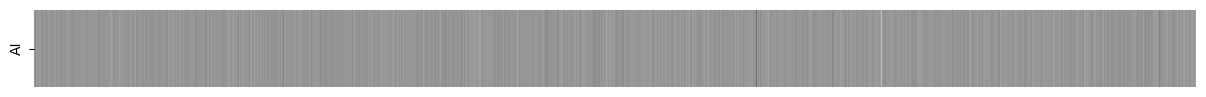

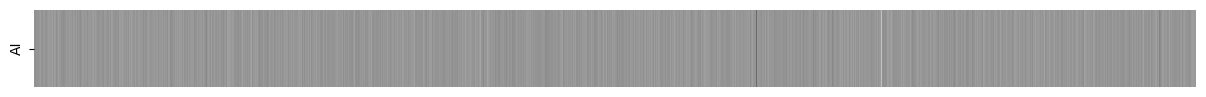

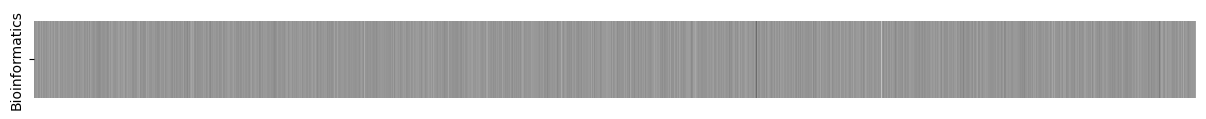

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
embed_len_thr = 1536

sns.heatmap(np.array(embedding1[:embed_len_thr]).reshape(-1, embed_len_thr),cmap="Greys",center=0,square=False, xticklabels=False, 
           cbar=False)
plt.gcf().set_size_inches(15,1)
plt.yticks([0.5], labels = ['AI'])
plt.show()

sns.heatmap(np.array(embedding3[:embed_len_thr]).reshape(-1, embed_len_thr),cmap="Greys",center=0,square=False, xticklabels=False, 
           cbar=False)
plt.gcf().set_size_inches(15,1)
plt.yticks([0.5], labels = ['AI'])
plt.show()

sns.heatmap(np.array(embedding2[:embed_len_thr]).reshape(-1, embed_len_thr),cmap="Greys",center=0,square=False, xticklabels=False, 
           cbar=False)
plt.gcf().set_size_inches(15,1)
plt.yticks([0.5], labels = ['Bioinformatics'])
plt.show()

# Applications

### Classification

In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [459]:
class_model = RandomForestClassifier(max_depth = 10)

In [460]:
X = embeddings_array
y = df.topic

In [461]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size=0.2, stratify=y
)

In [462]:
class_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [463]:
y_pred = class_model.predict(X_test)

array([[11,  0,  0,  1,  2,  0,  3,  0,  0,  3,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

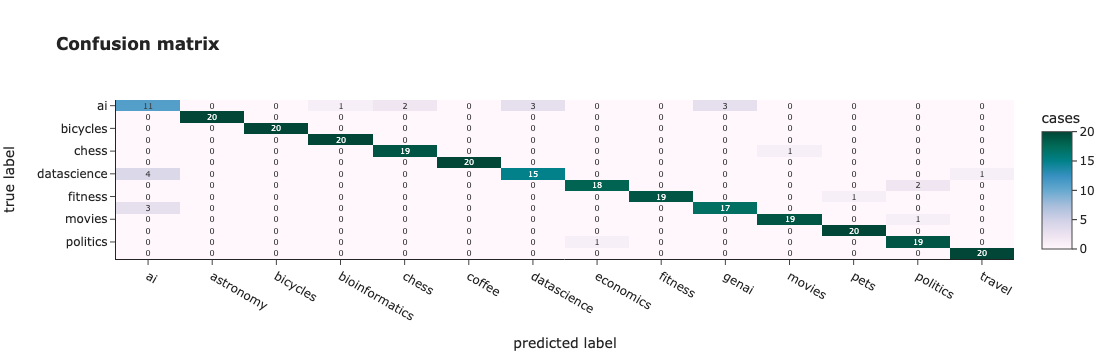

In [575]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig = px.imshow(cm, 
                x = class_model.classes_,
                y = class_model.classes_,
                text_auto='d', aspect="auto",
               labels=dict(x="predicted label", y="true label", color="cases"), color_continuous_scale='pubugn',
               title = '<b>Confusion matrix</b>', height = 550)
fig.show()

In [591]:
np.diag(cm).sum()/y_pred.shape[0]*100

91.78571428571428

### Clusterisation

In [490]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, 
                random_state=42, 
                n_init = 'auto').fit(embeddings_array)

kmeans_labels = kmeans.labels_
tsne_model = TSNE(n_components=2, random_state=42)
tsne_embeddings_values = tsne_model.fit_transform(embeddings_array)

In [493]:
kmeans_labels

array([2, 2, 2, ..., 9, 9, 9], dtype=int32)

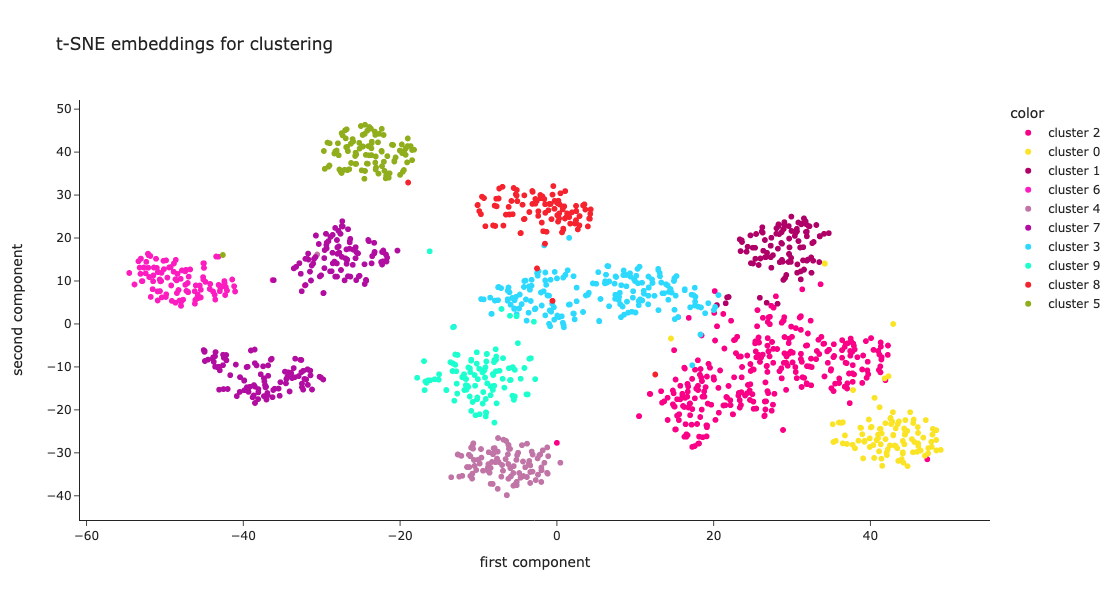

In [570]:
fig = px.scatter(
    x = tsne_embeddings_values[:,0], 
    y = tsne_embeddings_values[:,1],
    color = list(map(lambda x: 'cluster %s' % x, kmeans_labels)),
    hover_name = df.full_text.values,
    title = 't-SNE embeddings for clustering', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

In [514]:
df['cluster'] = list(map(lambda x: 'cluster %s' % x, kmeans_labels))

In [515]:
cluster_stats_df = df.reset_index().pivot_table(index = 'cluster', values = 'id', aggfunc = 'count', columns = 'topic')\
    .fillna(0).applymap(int)

In [516]:
cluster_stats_df = cluster_stats_df.apply(lambda x: 100*x/cluster_stats_df.sum(axis = 1))

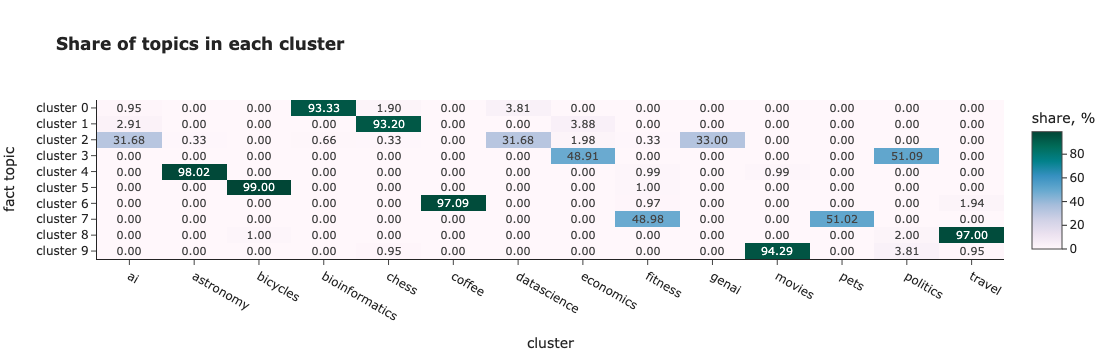

In [572]:
fig = px.imshow(cluster_stats_df.values, 
                x = cluster_stats_df.columns,
                y = cluster_stats_df.index,
                text_auto='.2f', aspect="auto",
               labels=dict(x="cluster", y="fact topic", color="share, %"), color_continuous_scale='pubugn',
               title = '<b>Share of topics in each cluster</b>', height = 550)
fig.show()

In [518]:
### Finding anomalies

In [556]:
topic_df = df[df.topic == 'travel']
topic_embeddings_array = np.array(topic_df.embedding.values.tolist())

In [576]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination = 0.01, random_state = 42) 

topic_df['is_anomaly'] = clf.fit_predict(topic_embeddings_array)

In [577]:
topic_df[topic_df.is_anomaly == -1][['full_text']]

full_text
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
883  Is it safe to drink the water from the fountains found all over the older parts of Rome?\nWhen I visited Rome and walked around the older sections, I saw many different types of fountains that were constantly running with water. Some went into the ground, some collected in basins, etc.\nIs the water coming out of these fountains potable? Safe for visitors to drink from? Any etiquette regarding their use that a visitor should know about?\nThese are the fountains known as nasoni (or "large noses"), for example:\n\n

In [579]:
print('Is it safe to drink the water from the fountains found all over the older parts of Rome?\nWhen I visited Rome and walked around the older sections, I saw many different types of fountains that were constantly running with water. Some went into the ground, some collected in basins, etc.\nIs the water coming out of these fountains potable? Safe for visitors to drink from? Any etiquette regarding their use that a visitor should know about?\nThese are the fountains known as nasoni (or "large noses")')

Is it safe to drink the water from the fountains found all over the older parts of Rome?
When I visited Rome and walked around the older sections, I saw many different types of fountains that were constantly running with water. Some went into the ground, some collected in basins, etc.
Is the water coming out of these fountains potable? Safe for visitors to drink from? Any etiquette regarding their use that a visitor should know about?
These are the fountains known as nasoni (or "large noses")


In [565]:
topic_df.is_anomaly.value_counts()

is_anomaly
 1    97
-1     3
Name: count, dtype: int64

In [593]:
import math

In [595]:
math.cos(math.pi/2)

6.123233995736766e-17

In [596]:
math.radians(90)

1.5707963267948966

In [597]:
import numpy as np

In [602]:
tmp_data = []
for degree in np.arange(-180, 181):
    tmp_data.append(
        {'degrees': degree, 'cosine': math.cos(math.radians(degree))}
    )

In [603]:
df = pd.DataFrame(tmp_data)

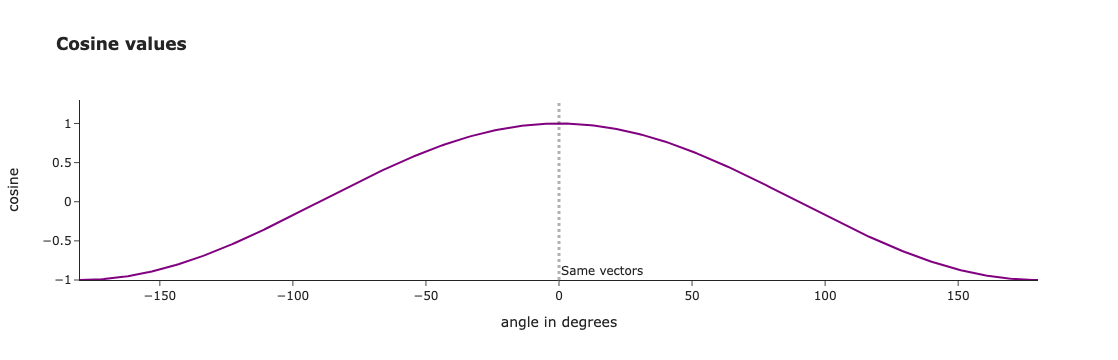

In [626]:
fig = px.line(df.set_index('degrees'),
       title = '<b>Cosine values</b>', labels = {'degrees': 'angle in degrees', 'value': 'cosine'},
        color_discrete_map={'cosine': 'purple'})

fig.add_vline(
    x=0, line_width=3, line_dash="dot", 
    line_color='black', annotation_text="Same vectors", 
    annotation_position="bottom right"
)

fig.update_layout(showlegend = False)
fig.update_yaxes(range = [-1, 1.3])